In [1]:
import pandas as pd
import pyarrow

https://banks.data.fdic.gov/explore/failures/?aggReport=detail&displayFields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&endFailYear=2024&sortField=FAILDATE&sortOrder=desc&startFailYear=2012

Pandas for Your Database with Matt Harrison | Scalable Pandas Meetup 11
Ponder
https://www.youtube.com/watch?v=eqdCj2Edzuk&t=1304s




In [14]:
df = pd.read_csv('bank-data-complete.csv')
df1 = pd.read_csv('bank-data-complete.csv', dtype_backend='pyarrow', engine='pyarrow')

In [15]:
df

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,27332.0,NM,"PHILADELPHIA, PA",NaN,4/26/2024,10546,4110,REPUBLIC BANK,5866190.0,4373927.0,FAILURE,PA,BIF
1,8758.0,NM,"SAC CITY, IA",14804.0,11/3/2023,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF
2,25851.0,SM,"ELKHART, KS",54167.0,7/28/2023,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF
3,59017.0,NM,"SAN FRANCISCO, CA",16566779.0,5/1/2023,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF
4,57053.0,NM,"NEW YORK, NY",2787270.0,3/12/2023,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,NaN,NM,"LEWISPORT, KY",NaN,8/6/1934,0,5,BANK OF LEWISPORT,81.0,68.0,FAILURE,PO,FDIC
4106,NaN,N,"LIMA, MT",NaN,7/18/1934,0,3,FIRST NATIONAL BANK OF LIMA,91.0,42.0,FAILURE,PO,FDIC
4107,NaN,NM,"FLORENCE, IN",NaN,7/18/1934,0,4,FLORENCE DEPOSIT BANK,105.0,69.0,FAILURE,PO,FDIC
4108,NaN,NM,"EAST PEORIA, IL",NaN,5/28/1934,0,1,FON DU LAC STATE BANK,374.0,238.0,FAILURE,PO,FDIC


In [16]:
df.dtypes

CERT        float64
CHCLASS1     object
CITYST       object
COST        float64
FAILDATE     object
FIN           int64
ID            int64
NAME         object
QBFASSET    float64
QBFDEP      float64
RESTYPE      object
RESTYPE1     object
SAVR         object
dtype: object

In [17]:
df.columns

Index(['CERT', 'CHCLASS1', 'CITYST', 'COST', 'FAILDATE', 'FIN', 'ID', 'NAME',
       'QBFASSET', 'QBFDEP', 'RESTYPE', 'RESTYPE1', 'SAVR'],
      dtype='object')

In [18]:
colnames = {'CHCLASS1':'CHARTER_CLASS', 'CITYST':'LOCATION', 'COST':'ESTIMATED_LOSS', 'FAILDATE':'EFECTIVE_DATE', 'NAME':'INSTITUTION',
       'QBFASSET':'TOTAL_ASSETS', 'QBFDEP':'TOTAL_DEPOSITS', 'RESTYPE':'RESOLUTION', 'RESTYPE1':'RESOLUTION_TYPE', 'SAVR':'INSURANCE_FUND'}

In [19]:
def tweak_bank(df):
    return (df
           .assign(FAILDATE=pd.to_datetime(df.FAILDATE, format='%m/%d/%Y'), 
                CITY=df.CITYST.str.split(',').str[0], 
                STATE=df.CITYST.str.split(',').str[1]
                )
                .drop(columns=['CITYST'])
                .rename(columns=colnames)
        )

bank = tweak_bank(df)
bank


,CERT,CHARTER_CLASS,ESTIMATED_LOSS,EFECTIVE_DATE,FIN,ID,INSTITUTION,TOTAL_ASSETS,TOTAL_DEPOSITS,RESOLUTION,RESOLUTION_TYPE,INSURANCE_FUND,CITY,STATE
0,27332.0,NM,NaN,2024-04-26,10546,4110,REPUBLIC BANK,5866190.0,4373927.0,FAILURE,PA,BIF,PHILADELPHIA,PA
1,8758.0,NM,14804.0,2023-11-03,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF,SAC CITY,IA
2,25851.0,SM,54167.0,2023-07-28,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF,ELKHART,KS
3,59017.0,NM,16566779.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF,SAN FRANCISCO,CA
4,57053.0,NM,2787270.0,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF,NEW YORK,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,NaN,NM,NaN,1934-08-06,0,5,BANK OF LEWISPORT,81.0,68.0,FAILURE,PO,FDIC,LEWISPORT,KY
4106,NaN,N,NaN,1934-07-18,0,3,FIRST NATIONAL BANK OF LIMA,91.0,42.0,FAILURE,PO,FDIC,LIMA,MT
4107,NaN,NM,NaN,1934-07-18,0,4,FLORENCE DEPOSIT BANK,105.0,69.0,FAILURE,PO,FDIC,FLORENCE,IN
4108,NaN,NM,NaN,1934-05-28,0,1,FON DU LAC STATE BANK,374.0,238.0,FAILURE,PO,FDIC,EAST PEORIA,IL


In [20]:
bank.describe()

,CERT,ESTIMATED_LOSS,EFECTIVE_DATE,FIN,ID,TOTAL_ASSETS,TOTAL_DEPOSITS
count,3622.000000,3.472000e+03,4110,4110.000000,4110.000000,3.956000e+03,4.108000e+03
mean,24520.187189,8.578129e+04,1985-12-31 13:11:49.489051072,4178.267883,2055.500000,1.367285e+06,7.532951e+05
min,40.000000,-1.138100e+04,1934-04-19 00:00:00,0.000000,1.000000,1.400000e+01,0.000000e+00
25%,18281.750000,3.161000e+03,1985-07-12 18:00:00,1754.250000,1028.250000,1.798425e+04,1.463475e+04
50%,26354.500000,1.131500e+04,1988-12-30 00:00:00,2967.500000,2055.500000,5.555550e+04,4.955650e+04
75%,30988.500000,4.290175e+04,1991-05-03 00:00:00,7030.750000,3082.750000,1.976018e+05,1.751820e+05
max,91189.000000,1.967171e+07,2024-04-26 00:00:00,12894.000000,4110.000000,1.471631e+09,9.546776e+08
std,11650.400295,5.432351e+05,NaN,3332.545510,1186.599132,3.128922e+07,1.620899e+07


FAILURE POR AÑO

In [30]:
bank.EFECTIVE_DATE #Como se convirtio previamente a dtype: datetime64, se puede trabajar con diferentes metodos y funciones dt 

0      2024-04-26
1      2023-11-03
2      2023-07-28
3      2023-05-01
4      2023-03-12
          ...    
4105   1934-08-06
4106   1934-07-18
4107   1934-07-18
4108   1934-05-28
4109   1934-04-19
Name: EFECTIVE_DATE, Length: 4110, dtype: datetime64[ns]

In [21]:
bank.EFECTIVE_DATE.dt.year

0       2024
1       2023
2       2023
3       2023
4       2023
        ... 
4105    1934
4106    1934
4107    1934
4108    1934
4109    1934
Name: EFECTIVE_DATE, Length: 4110, dtype: int32

In [22]:
(bank
 .groupby(bank.EFECTIVE_DATE.dt.year)
  .size()
  )

EFECTIVE_DATE
1934     9
1935    25
1936    69
1937    75
1938    74
        ..
2017     8
2019     4
2020     4
2023     5
2024     1
Length: 86, dtype: int64

In [25]:
(bank
 .groupby(bank.EFECTIVE_DATE.dt.year)
  .size()
  )

EFECTIVE_DATE
1934     9
1935    25
1936    69
1937    75
1938    74
        ..
2017     8
2019     4
2020     4
2023     5
2024     1
Length: 86, dtype: int64

<Axes: xlabel='EFECTIVE_DATE'>

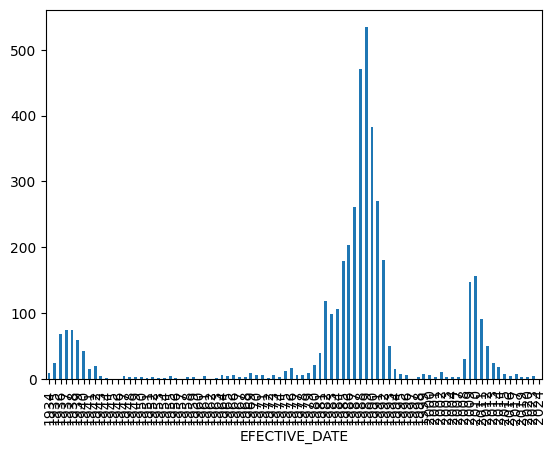

In [31]:
(bank
 .groupby(bank.EFECTIVE_DATE.dt.year)
  .size()
  .plot.bar()#aqui Pandas convierte la serie en categorica, por lo que no se podrá visualizar bien.
  )

<Axes: xlabel='EFECTIVE_DATE'>

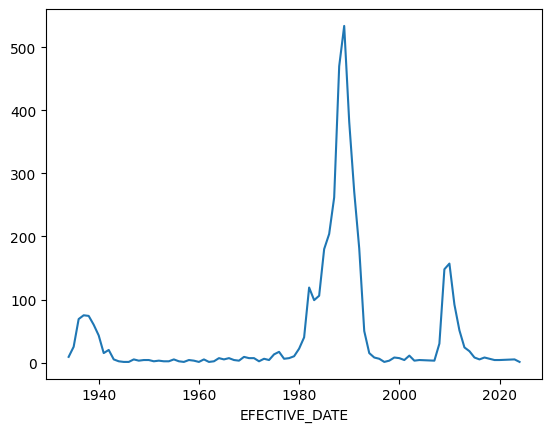

In [32]:
(bank
 .groupby(bank.EFECTIVE_DATE.dt.year)
  .size()
  .plot()
  )

MEJORANDO EL GRAFICO CON MATPLOTLIB

**AGRUPANDO POR ALIAS. SERIES DE TIEMPO**

Con Pandas podemos manipular diferentes frecuencias con diferentes muestras (samples)

In [36]:
(
    bank.head(5)
    
) 

,CERT,CHARTER_CLASS,ESTIMATED_LOSS,EFECTIVE_DATE,FIN,ID,INSTITUTION,TOTAL_ASSETS,TOTAL_DEPOSITS,RESOLUTION,RESOLUTION_TYPE,INSURANCE_FUND,CITY,STATE
0,27332.0,NM,NaN,2024-04-26,10546,4110,REPUBLIC BANK,5866190.0,4373927.0,FAILURE,PA,BIF,PHILADELPHIA,PA
1,8758.0,NM,14804.0,2023-11-03,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF,SAC CITY,IA
2,25851.0,SM,54167.0,2023-07-28,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF,ELKHART,KS
3,59017.0,NM,16566779.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF,SAN FRANCISCO,CA
4,57053.0,NM,2787270.0,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF,NEW YORK,NY


In [35]:
#Pondremos como indice a EFECTIVE_DATE
(
 bank
 .set_index('EFECTIVE_DATE')
    
) 


,CERT,CHARTER_CLASS,ESTIMATED_LOSS,FIN,ID,INSTITUTION,TOTAL_ASSETS,TOTAL_DEPOSITS,RESOLUTION,RESOLUTION_TYPE,INSURANCE_FUND,CITY,STATE
EFECTIVE_DATE,,,,,,,,,,,,,
2024-04-26,27332.0,NM,NaN,10546,4110,REPUBLIC BANK,5866190.0,4373927.0,FAILURE,PA,BIF,PHILADELPHIA,PA
2023-11-03,8758.0,NM,14804.0,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF,SAC CITY,IA
2023-07-28,25851.0,SM,54167.0,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF,ELKHART,KS
2023-05-01,59017.0,NM,16566779.0,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF,SAN FRANCISCO,CA
2023-03-12,57053.0,NM,2787270.0,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF,NEW YORK,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934-08-06,NaN,NM,NaN,0,5,BANK OF LEWISPORT,81.0,68.0,FAILURE,PO,FDIC,LEWISPORT,KY
1934-07-18,NaN,N,NaN,0,3,FIRST NATIONAL BANK OF LIMA,91.0,42.0,FAILURE,PO,FDIC,LIMA,MT
1934-07-18,NaN,NM,NaN,0,4,FLORENCE DEPOSIT BANK,105.0,69.0,FAILURE,PO,FDIC,FLORENCE,IN


In [39]:
#Cuando en Pandas ponemos como indice a un date.. esto nos permite resamplear
#Pondremos como indice a EFECTIVE_DATE
(
 bank
 .set_index('EFECTIVE_DATE')
 .resample('M') #Se pasa un alias. M dice a nivel mes. Pero ojo necesita que se hag un aggregation!!!
 .size()  # Es la aggregation
) 



EFECTIVE_DATE
1934-04-30    1
1934-05-31    1
1934-06-30    0
1934-07-31    2
1934-08-31    1
             ..
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    1
Freq: M, Length: 1081, dtype: int64

<Axes: xlabel='EFECTIVE_DATE'>

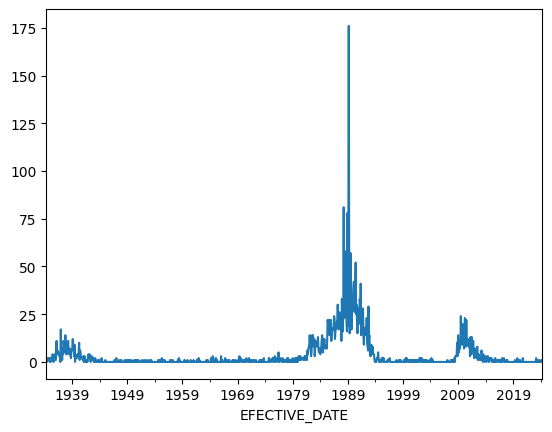

In [40]:
#Como tenemos un indice a un "date" podemos graficarlo mejor
(
 bank
 .set_index('EFECTIVE_DATE')
 .resample('M') 
 .size() 
 .plot()
) 

SUavizando el Grafico con AGREGATIONS

Agregations Mensuales y Anuales:

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4))
def plot_montly_and_yearly